In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [2]:
1080*720

777600

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml("mnist_784", version=1, cache=True)

In [5]:
type(mnist)

sklearn.utils.Bunch

In [6]:
features = mnist['data']

In [7]:
len(mnist['feature_names'])

784

In [8]:
target = mnist['target']

In [9]:
target[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [10]:
def show_img(img, label):
    plt.imshow(img, cmap='binary')
    plt.title(label)
    plt.axis('off')
    plt.show()

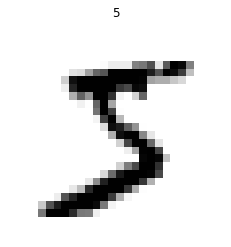

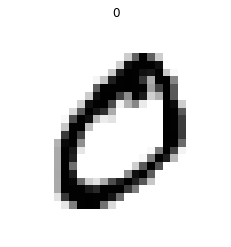

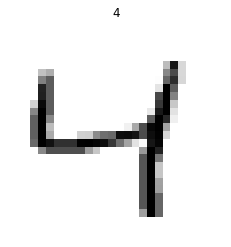

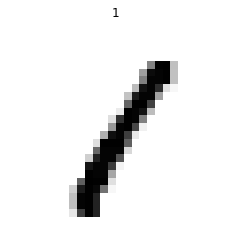

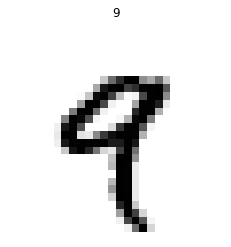

In [11]:
c = 1
for lb, img in zip(target, features.values):
    img = img.reshape(28, 28)
    show_img(img, lb)
    if c == 5:
        break
    c += 1

In [12]:
features[:5]

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

#### SGDClassifier 

##### Binary Classifier

In [13]:
target.unique()

[5, 0, 4, 1, 9, 2, 3, 6, 7, 8]
Categories (10, object): [5, 0, 4, 1, ..., 3, 6, 7, 8]

In [14]:
target.value_counts() / len(target)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: class, dtype: float64

### 5 Classifier 

    5 - positive
    
    not 5 - negative (0-9 except 5)

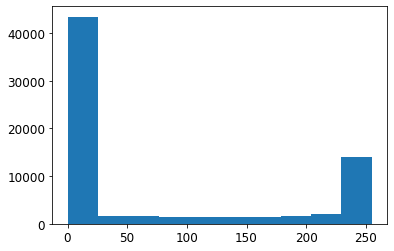

In [15]:
plt.hist(features.iloc[:, 400])
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

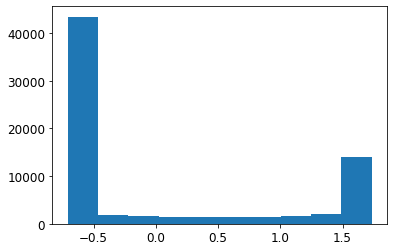

In [17]:
plt.hist(StandardScaler().fit_transform(features)[:, 400])
plt.show()

In [18]:
target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [19]:
target = target.astype(int)

In [20]:
y = (target == 5)

In [21]:
np.unique(y)

array([False,  True])

In [22]:
no_5s = sum(y)
no_not_5s = len(y) - no_5s

In [23]:
print(no_5s/len(y))

0.09018571428571429


In [24]:
print(no_not_5s/len(y))

0.9098142857142857


In [25]:
img = []
for row in range(720):
    cols = []
    for col in range(1080):
        cols.append([255, 0, 0])
    img.append(cols)

In [26]:
img = np.array(img, np.uint8)

In [27]:
img.shape

(720, 1080, 3)

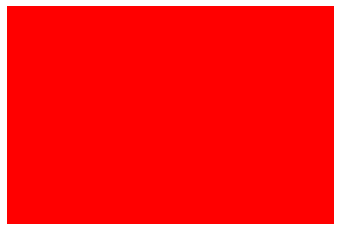

In [28]:
plt.imshow(img)
plt.axis('off')
plt.show()

    Scaling is important in SGDClassifier

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X = StandardScaler().fit_transform(features)

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
(tr_idx, ts_idx), = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2).split(X, y)

In [33]:
X_train, X_test, y_train, y_test = X[tr_idx], X[ts_idx], y[tr_idx], y[ts_idx]

In [34]:
y_train.sum() / len(y_train)

0.09017857142857143

In [35]:
y_test.sum() / len(y_test)

0.09021428571428572

    This data is highly imbalances so you can a technique called SMOTE to create a balance data set

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

    Tensorflow / PyTorch

In [37]:
sgd_clf = SGDClassifier()

In [46]:
ensemble = RandomForestClassifier()

In [66]:
svc = SVC(probability=True)

In [67]:
sgd_clf.fit(X_train, y_train)


SGDClassifier()

In [47]:
ensemble.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [50]:
sgd_pred = sgd_clf.predict(X_train)
ensemble_pred = ensemble.predict(X_train)
svc_pred = svc.predict(X_train)

In [51]:
print("SGD")
print(confusion_matrix(y_train, sgd_pred))
print("Random Forest")
print(confusion_matrix(y_train, ensemble_pred))
print("SVM ")
print(confusion_matrix(y_train, svc_pred))

SGD
[[50486   464]
 [ 1021  4029]]
Random Forest
[[50950     0]
 [    0  5050]]
SVM 
[[50919    31]
 [  190  4860]]


In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

In [70]:
#svc.predict_proba(X_test)

SGD ROC AUC SCORE :  0.9759036444157336
Random Forest ROC AUC SCORE :  0.998762466019566
SVM ROC AUC SCORE :  0.9977371553166687


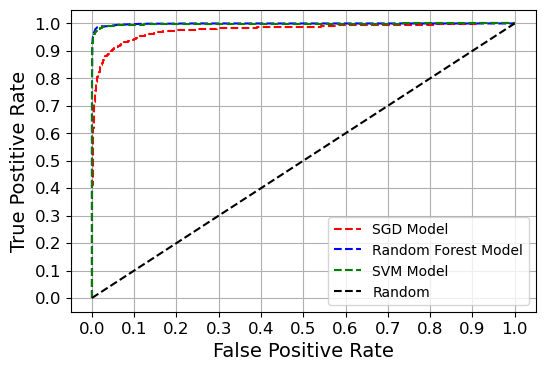

In [71]:
score = sgd_clf.decision_function(X_test)
fpr, tpr, thres = roc_curve(y_test, score)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'r--', label='SGD Model')
print("SGD ROC AUC SCORE : ", roc_auc_score(y_test, score))

score = ensemble.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, score)
plt.plot(fpr, tpr, 'b--', label='Random Forest Model')
print("Random Forest ROC AUC SCORE : ", roc_auc_score(y_test, score))

score = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, score)
plt.plot(fpr, tpr, 'g--', label='SVM Model')
print("SVM ROC AUC SCORE : ", roc_auc_score(y_test, score))

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postitive Rate")
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 1.1, .1))
plt.yticks(np.arange(0, 1.1, .1))


plt.show()


In [39]:
y_hat_train = sgd_clf.predict(X_train)

In [40]:
y_hat_test = sgd_clf.predict(X_test)

### Performance of Model

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
print(confusion_matrix(y_train, y_hat_train))

[[50486   464]
 [ 1021  4029]]


In [43]:
print(confusion_matrix(y_test, y_hat_test))

[[12611   126]
 [  280   983]]


In [44]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_train, y_hat_train)

0.9734821428571429

In [66]:
accuracy_score(y_test, y_hat_test)

0.971

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     50950
        True       0.90      0.80      0.84      5050

    accuracy                           0.97     56000
   macro avg       0.94      0.89      0.91     56000
weighted avg       0.97      0.97      0.97     56000



In [71]:
#sgd_clf.predict_proba(X_train) y = b + wx

In [74]:
train_score = sgd_clf.decision_function(X_train)
test_score  = sgd_clf.decision_function(X_test)
# SGD -> 0

In [78]:
th = 0
print(confusion_matrix(y_train, (train_score >= th)))

[[50486   464]
 [ 1021  4029]]


In [81]:
from sklearn.metrics import precision_recall_curve

In [82]:
precisions, recalls, thresholds = precision_recall_curve(y_train, train_score)

In [91]:
def plot_pr_curve(pr, re, th):
    plt.figure(dpi=100)
    plt.title("Precision Recall Trade Off")
    plt.plot(th, pr[:-1], 'r--', label='precision')
    plt.plot(th, re[:-1], 'g:', label='recall')
    plt.vlines(0, 0, 1, ls='--', color='k')
    plt.legend()
    plt.grid()
    #plt.axis([0, 1.25, 0, 1.25])
    #plt.xticks(np.arange(0, 1.1, .1))
    plt.yticks(np.arange(0, 1.1, .05))
    plt.tight_layout()
    plt.show()

In [93]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     50950
        True       0.90      0.80      0.84      5050

    accuracy                           0.97     56000
   macro avg       0.94      0.89      0.91     56000
weighted avg       0.97      0.97      0.97     56000



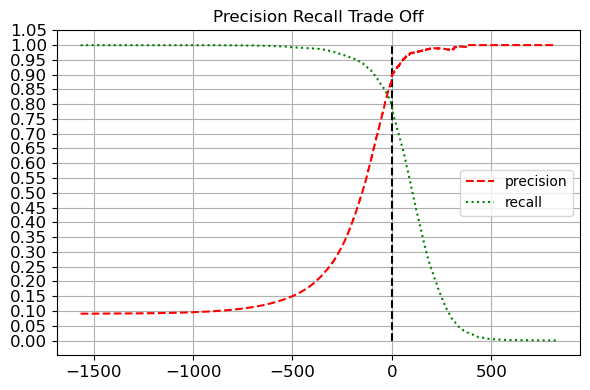

In [92]:
plot_pr_curve(precisions, recalls, thresholds)

In [100]:
th = -40
print(confusion_matrix(y_train, (train_score >= th)))

[[49794  1156]
 [  745  4305]]


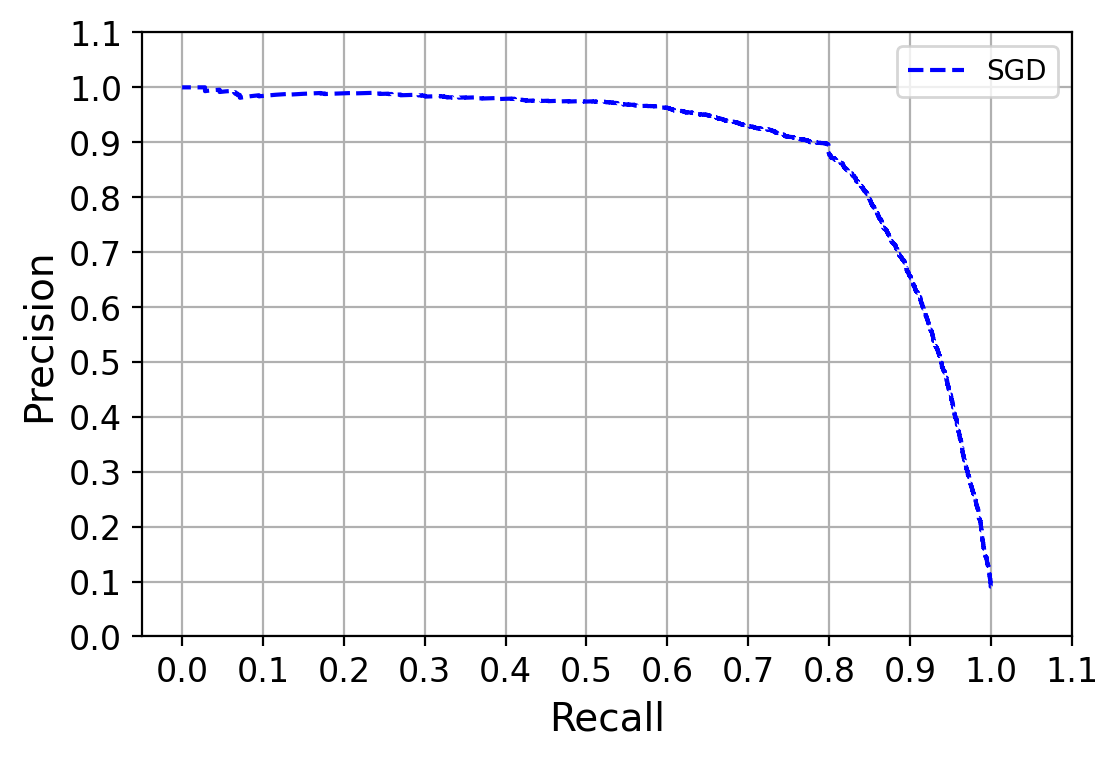

In [110]:
plt.figure(dpi=200)
plt.plot(recalls, precisions, 'b--', label='SGD')
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 1.2, .1))
plt.yticks(np.arange(0, 1.2, .1))
plt.show()

### ROC

        Receiver Operating Characterstics